Note: before we set up the conda lock, please use the following command to load the dataset

`Install the ucimlrepo package`

### Import Library

In [1]:
from ucimlrepo import fetch_ucirepo 
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

### Load Data

Data Source: https://archive.ics.uci.edu/dataset/848/secondary+mushroom+dataset

In [2]:
# fetch dataset as pandas DataFrames
secondary_mushroom = fetch_ucirepo(id=848) 
X = secondary_mushroom.data.features 
y = secondary_mushroom.data.targets 

Before splitting the data into test and training sets, we want to check for missing values in each column to determine whether they can be used in our model.

In [3]:
X.isnull().sum()

cap-diameter                0
cap-shape                   0
cap-surface             14120
cap-color                   0
does-bruise-or-bleed        0
gill-attachment          9884
gill-spacing            25063
gill-color                  0
stem-height                 0
stem-width                  0
stem-root               51538
stem-surface            38124
stem-color                  0
veil-type               57892
veil-color              53656
has-ring                    0
ring-type                2471
spore-print-color       54715
habitat                     0
season                      0
dtype: int64

We are going to the columns where more than 15% of the values are missing. These columns are not useful.

In [4]:
colunms_to_drop = ['cap-surface', 'gill-attachment', 'gill-spacing', 
                   'stem-root', 'stem-surface', 'veil-type', 'veil-color', 
                   'spore-print-color']
X = X.drop(columns = colunms_to_drop)

In [5]:
# Split the data test and training set

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=123
)

### EDA

#### Part 1: Missing Values

In [6]:
X_train.isnull().sum()

cap-diameter               0
cap-shape                  0
cap-color                  0
does-bruise-or-bleed       0
gill-color                 0
stem-height                0
stem-width                 0
stem-color                 0
has-ring                   0
ring-type               1998
habitat                    0
season                     0
dtype: int64

There exist missing values in the `ring-type` feature.

#### Part 2: The distribution of numeric features

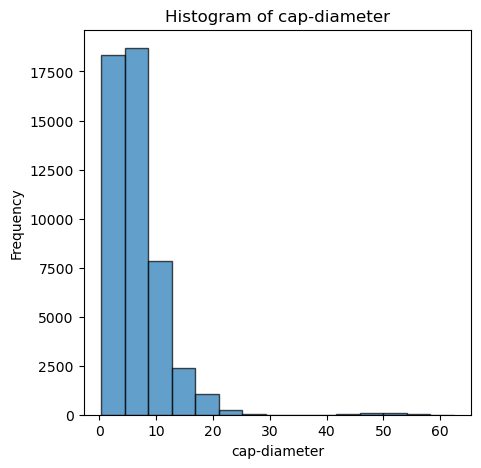

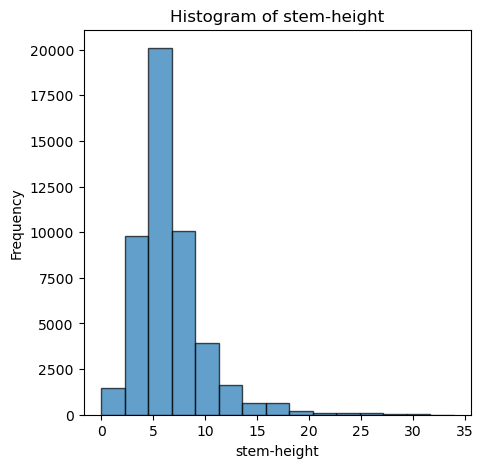

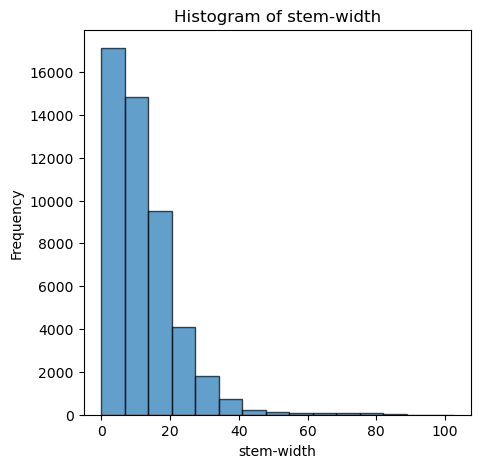

In [7]:
numeric_columns = X_train.select_dtypes(include='number')  # Select only numeric columns

for column in numeric_columns.columns:
    plt.figure(figsize=(5,5))
    plt.hist(X_train[column], bins=15, edgecolor='black', alpha=0.7)
    plt.title(f'Histogram of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.show()

#### Part 3: The distribution of categorical features

In [8]:
categorical_columns = X_train.select_dtypes(include='object')  # Select only categorical columns

# Calculate frequency and percentage for each categorical features
for column in categorical_columns.columns:
    print(f"Frequency and Percentage for '{column}':")
    
    # Frequency
    frequency = X_train[column].value_counts()
    # Percentage
    percentage = round(X_train[column].value_counts(normalize=True) * 100, 2)
    
    # Combine into one DataFrame
    freq_percent_df = pd.DataFrame({
        "Frequency": frequency,
        "Percentage": percentage
    })
    
    print(freq_percent_df)
    print("-" * 50, "\n")

Frequency and Percentage for 'cap-shape':
           Frequency  Percentage
cap-shape                       
x              21482       43.97
f              10735       21.97
s               5713       11.69
b               4580        9.37
o               2812        5.76
p               2090        4.28
c               1443        2.95
-------------------------------------------------- 

Frequency and Percentage for 'cap-color':
           Frequency  Percentage
cap-color                       
n              19399       39.71
y               6841       14.00
w               6149       12.59
g               3490        7.14
e               3225        6.60
o               2943        6.02
r               1429        2.92
p               1391        2.85
u               1370        2.80
k                999        2.04
b                969        1.98
l                650        1.33
-------------------------------------------------- 

Frequency and Percentage for 'does-bruise-or-bleed'

#### Part 4: The distribution of the target

In [9]:
 # Frequency
frequency = y_train.value_counts()
# Percentage
percentage = round(y_train.value_counts(normalize=True) * 100, 2)

# Combine into one DataFrame
freq_percent_df = pd.DataFrame({
    "Frequency": frequency,
    "Percentage": percentage
})
freq_percent_df

,Frequency,Percentage
class,,
p,27143,55.56
e,21712,44.44
